In [5]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from statannot import add_stat_annotation

In [2]:
df2 = pd.read_csv("Log2fc_table2.csv")
df3 = pd.read_csv("Log2fc_table3.csv")
df4 = pd.read_csv("Log2fc_table4.csv")
df5 = pd.read_csv("Log2fc_table5.csv")
df6 = pd.read_csv("Log2fc_table6.csv")


In [8]:
### Differential expression gene ranking
def promedio_log2FC(var_df):

    var_df = var_df.rename(columns={"Unnamed: 0.1":"Genes"})
    var_df = var_df.drop("Unnamed: 0", axis=1)
    var_df["Same_diagnosis_Log2FC"] = ""
    var_df["Different_diagnosis_Log2FC"] = ""

    lista_same = []

    dicc_dif = {}
    dicc_list_dif = []

    dicc_same = {}
    #dicc_same = {"Gene": , "Log2fc_Lista":[]}
    dicc_list_same = []
    for j in tqdm(range(var_df.shape[0])):
        lista_same = []
        lista_dif = []
        for i in var_df.columns[1:-2]:
            x = i.split("::")
            a = x[0].split("_")
            b = x[1].split("_")

            if (a[1] == b[1]) and a[1] != "DOUBT" and b[1] != "DOUBT" and (a[1] != "OTHER" and b[1] != "OTHER"):
                lista_same.append(var_df[i][j])
                dicc_same = {"Gene": var_df["Genes"][j], "Log2fc_Lista": lista_same}
            elif (a[1] != b[1]) and a[1] != "DOUBT" and b[1] != "DOUBT" and (a[1] != "OTHER" and b[1] != "OTHER"):
                lista_dif.append(var_df[i][j])
                dicc_dif = {"Gene": var_df["Genes"][j], "Log2fc_Lista": lista_dif}



        dicc_list_same.append(dicc_same)
        dicc_list_dif.append(dicc_dif)

    if len(dicc_list_same) > 0:
        table = pd.DataFrame.from_dict(dicc_list_same)
        for j in tqdm(range(table.shape[0])):
            a = table["Log2fc_Lista"][j]
            lista_same_abs = []
            for i in a:
                i = abs(i)
                lista_same_abs.append(i)
            result = sum(lista_same_abs)/len(lista_same_abs)
            var_df["Same_diagnosis_Log2FC"][j] = result
    else:
        print("empty")

    if len(dicc_list_dif)>0:
        table1 = pd.DataFrame.from_dict(dicc_list_dif)
        for j in tqdm(range(table1.shape[0])):
            a = table1["Log2fc_Lista"][j]
            lista_dif_abs = []
            for i in a:
                i = abs(i)
                lista_dif_abs.append(i)
            result = sum(lista_dif_abs)/len(lista_dif_abs)
            var_df["Different_diagnosis_Log2FC"][j] = result
    else:
        print("empty")
    return(var_df)
df2 = promedio_log2FC(df2)[["Genes","Same_diagnosis_Log2FC", "Different_diagnosis_Log2FC"]]
df3 = promedio_log2FC(df3)[["Genes","Same_diagnosis_Log2FC", "Different_diagnosis_Log2FC"]]
df4 = promedio_log2FC(df4)[["Genes","Same_diagnosis_Log2FC", "Different_diagnosis_Log2FC"]]
df5 = promedio_log2FC(df5)[["Genes","Same_diagnosis_Log2FC", "Different_diagnosis_Log2FC"]]
df6 = promedio_log2FC(df6)[["Genes","Same_diagnosis_Log2FC", "Different_diagnosis_Log2FC"]]

  0%|          | 0/77 [00:00<?, ?it/s]<ipython-input-8-f2e4f75dcbe6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_df["Same_diagnosis_Log2FC"][j] = result
  0%|          | 0/77 [00:00<?, ?it/s]<ipython-input-8-f2e4f75dcbe6>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_df["Different_diagnosis_Log2FC"][j] = result
100%|██████████| 77/77 [00:00<00:00, 3508.20it/s]


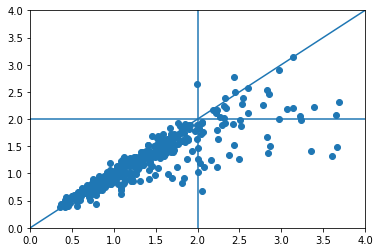

In [10]:
##Genes with bigger Log2FC difference

df_difference = df_global
df_difference["Difference"] = ""
df_difference["Difference"] = abs(df_difference["Same_diagnosis_Log2FC"].to_numpy() - \
                                  df_difference["Different_diagnosis_Log2FC"].to_numpy())
plt.scatter(df_difference["Different_diagnosis_Log2FC"],df_difference["Same_diagnosis_Log2FC"])
plt.xlim([0,4])
plt.ylim([0,4])
plt.axhline(2)
plt.axvline(2)
plt.axline((1,1), slope=1)
plt.show()
df_top_difference = df_difference.sort_values(["Difference"], ascending= False)


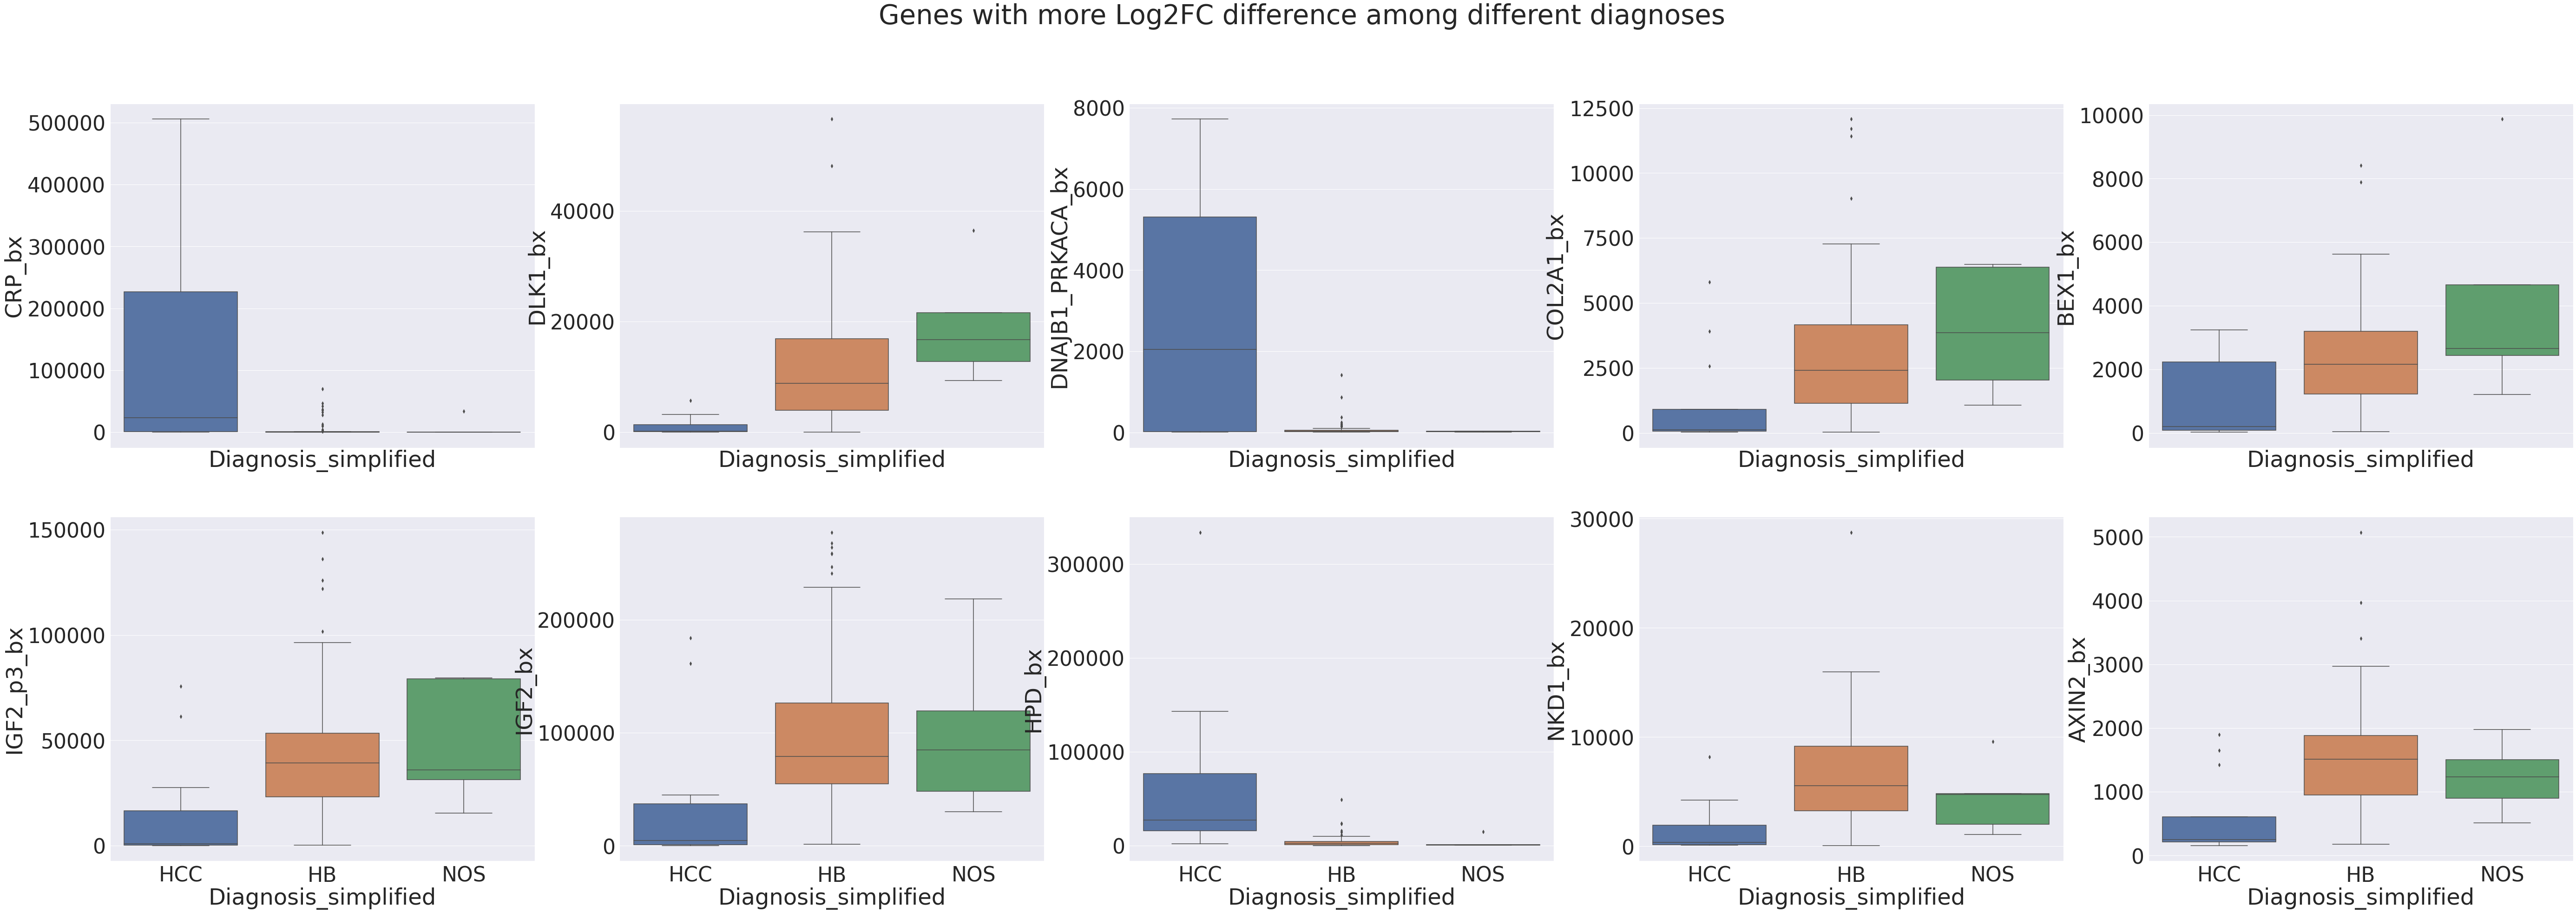

In [24]:
## Boxplots of genes

df_to10 = df_top_difference.head(10)
df1 = pd.read_csv("Nueva_global_180722.csv")
df1.columns = [i.replace(" ", "_") for i in df1.columns]


def function(var, num1, num2):
    df = df1[["Diagnosis_simplified", var]].dropna()
    df  = df1.loc[df1["Diagnosis_simplified"].isin(["HB", "HCC", "NOS"])]
    sns.set(font_scale=5)
    sns.boxplot(ax=axes[num1, num2], data=df, x='Diagnosis_simplified', y=var)
    
           
fig, axes = plt.subplots(2, 5, sharex=True, figsize=(95,30))
fig.suptitle('Genes with more Log2FC difference among different diagnoses')

genes = df_to10['Genes'].tolist()

a = 0
b = 0
c = 0

for j in range(len(genes)):
    genename = genes[j]
    num1 = 0
    num2 = a
    a += 1
    if num2 > 4:
        num1 = 1
        num2 = b
        b += 1
    
    
    
    
    function(genename, num1, num2)
